In [1]:
#Importo las librerías que voy a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

COMIENZO DEL EDA

CSV "TEAM": GUARDA INFORMACIÓN DE LOS 30 QUE ACTUALMENTE COMPITEN EN LA NBA

In [10]:
# Ruta del archivo CSV
file_path = 'C:\\Users\\FranciscoJH\\Downloads\\team.csv'

try:
    # Cargar el DataFrame
    df_team = pd.read_csv(file_path)

    print(f"--- Análisis EDA para: TEAM ---")

    #1. Información General
    print("\n--- 1. Información General (Tipos de Datos y Nulos) ---")
    df_team.info()

    # 2. df.shape - Para ver dimensiones
    print("\n--- 2. Forma del DataFrame (Filas, Columnas) ---")
    print(df_team.shape)

    # 3. df.isnull().sum() - Conteo explícito de nulos
    print("\n--- 3. Conteo de Valores Nulos por Columna ---")
    print(df_team.isnull().sum())

    # --- 4. Porcentaje de Valores Nulos por Columna (%) ---
    # (Este es el nuevo bloque que pediste)
    print("\n--- 4. Porcentaje de Valores Nulos por Columna (%) ---")
    # Dividimos el conteo de nulos por el total de filas y multiplicamos por 100
    total_rows = len(df_team)
    null_percentage = (df_team.isnull().sum() / total_rows) * 100
    print(null_percentage)

    # 5. df.describe(include='all') - Estadísticas básicas para TODAS las columnas
    print("\n--- 5. Estadísticas Descriptivas (Numéricas y Texto) ---")
    print(df_team.describe(include='all'))

    # 6. df.head() - Para ver las primeras filas
    print("\n--- 6. Primeras 5 Filas (Muestra de Datos) ---")
    print(df_team.head())

except FileNotFoundError:
    print(f"Error: No se encontró el archivo '{file_path}'.")
except Exception as e:
    print(f"Se produjo un error al procesar el archivo: {e}")

--- Análisis EDA para: TEAM ---

--- 1. Información General (Tipos de Datos y Nulos) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            30 non-null     int64 
 1   full_name     30 non-null     object
 2   abbreviation  30 non-null     object
 3   nickname      30 non-null     object
 4   city          30 non-null     object
 5   state         30 non-null     object
 6   year_founded  30 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 1.8+ KB

--- 2. Forma del DataFrame (Filas, Columnas) ---
(30, 7)

--- 3. Conteo de Valores Nulos por Columna ---
id              0
full_name       0
abbreviation    0
nickname        0
city            0
state           0
year_founded    0
dtype: int64

--- 4. Porcentaje de Valores Nulos por Columna (%) ---
id              0.0
full_name       0.0
abbreviation    0.0
nickname        0.0


COMIENZO CON LA LIMPIEZA DE DATOS

In [3]:
print("\n--- 1. Aplicando Limpieza de Datos ---")


# Arreglo 1: Convertir 'year_founded' de float a integer
# Uso astype porque no hay valores nulos en esa columna
if 'year_founded' in df_team.columns:
    df_team['year_founded'] = df_team['year_founded'].astype('int64')
    print("   - 'year_founded' convertido a integer.")

# Arreglo 2: Convertir 'id' de integer a string/object
if 'id' in df_team.columns:
    df_team['id'] = df_team['id'].astype(str)
    print("   - 'id' convertido a string (object).")

# Arreglo 3: Corregir ciudad de Golden State Warriors
# Uso .loc[] para encontrar la fila donde 'nickname' es 'Warriors' y cambiar 'city'
if 'nickname' in df_team.columns and 'city' in df_team.columns:
    df_team.loc[df_team['nickname'] == 'Warriors', 'city'] = 'San Francisco'
    print("   - Ciudad de 'Warriors' actualizada a 'San Francisco'.")

print("\n--- Verificación de Limpieza (df.info()) ---")
df_team.info()

print("\n--- Verificación de Corrección (Fila de Warriors) ---")
print(df_team[df_team['nickname'] == 'Warriors'])

#Guardo el DataFrame limpio en un nuevo archivo CSV
file_path = 'C:\\Users\\FranciscoJH\\Downloads\\team.csv'
df_team.to_csv(file_path, index=False)


--- 1. Aplicando Limpieza de Datos ---
   - 'year_founded' convertido a integer.
   - 'id' convertido a string (object).
   - Ciudad de 'Warriors' actualizada a 'San Francisco'.

--- Verificación de Limpieza (df.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            30 non-null     object
 1   full_name     30 non-null     object
 2   abbreviation  30 non-null     object
 3   nickname      30 non-null     object
 4   city          30 non-null     object
 5   state         30 non-null     object
 6   year_founded  30 non-null     int64 
dtypes: int64(1), object(6)
memory usage: 1.8+ KB

--- Verificación de Corrección (Fila de Warriors) ---
           id              full_name abbreviation  nickname           city  \
7  1610612744  Golden State Warriors          GSW  Warriors  San Francisco   

        state  year_founded  
7  

CONTINUO CON LAS VISUALIZACIONES

Años de Fundación de los Equipos

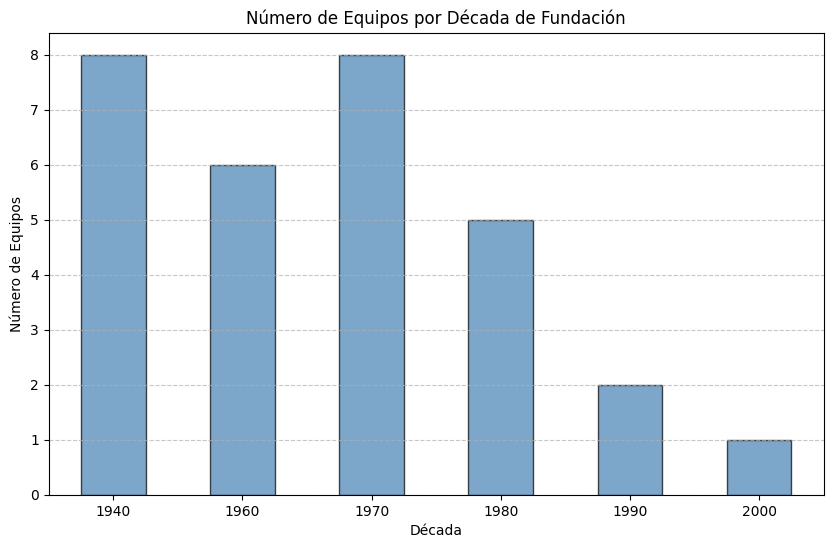

In [4]:
# 1. Calculamos las décadas en que se fundaron los equipos
decades_series = (df_team['year_founded'] // 10) * 10

# 2. Contamos cuántos equipos hay en cada década usando esa serie temporal
decade_counts = decades_series.value_counts()

# 3. Ordenamos por la década (el índice) para un gráfico cronológico
decade_counts = decade_counts.sort_index()

# 4. Creamos un nuevo lienzo (figura)
plt.figure(figsize=(10, 6))

# 5. Creamos el gráfico de barras
decade_counts.plot(kind='bar', edgecolor='black', alpha=0.7, color='steelblue')

plt.title('Número de Equipos por Década de Fundación')
plt.xlabel('Década')
plt.ylabel('Número de Equipos')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 6. Rotamos las etiquetas del eje X
plt.xticks(rotation=0)

# Muestra el gráfico finalizado en esta celda
plt.show()

Equipos por Estado

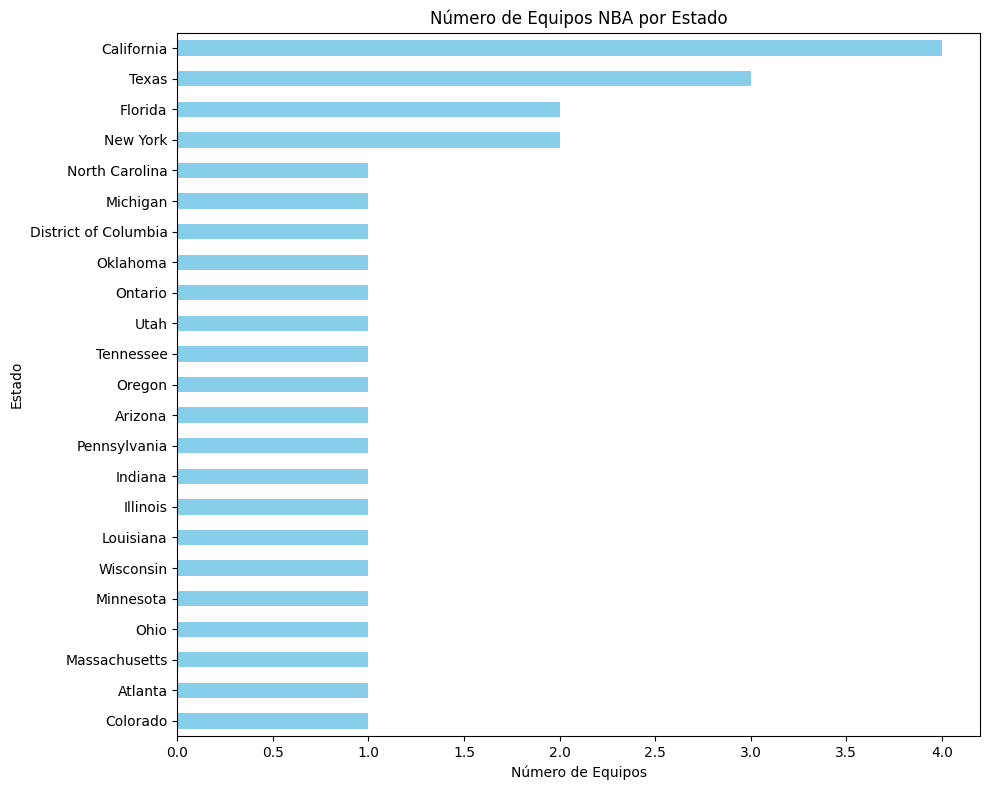

In [5]:
# Creamos un lienzo para este gráfico
plt.figure(figsize=(10, 8))

# Contamos cuántas veces aparece cada estado y lo ordenamos
state_counts = df_team['state'].value_counts().sort_values(ascending=True)

# Hacemos un gráfico de barras horizontal
state_counts.plot(kind='barh', color='skyblue')

plt.title('Número de Equipos NBA por Estado')
plt.xlabel('Número de Equipos')
plt.ylabel('Estado')

# Aseguramos que las etiquetas no se corten
plt.tight_layout()

# Muestra el gráfico finalizado en esta celda
plt.show()

Equipos por Ciudad

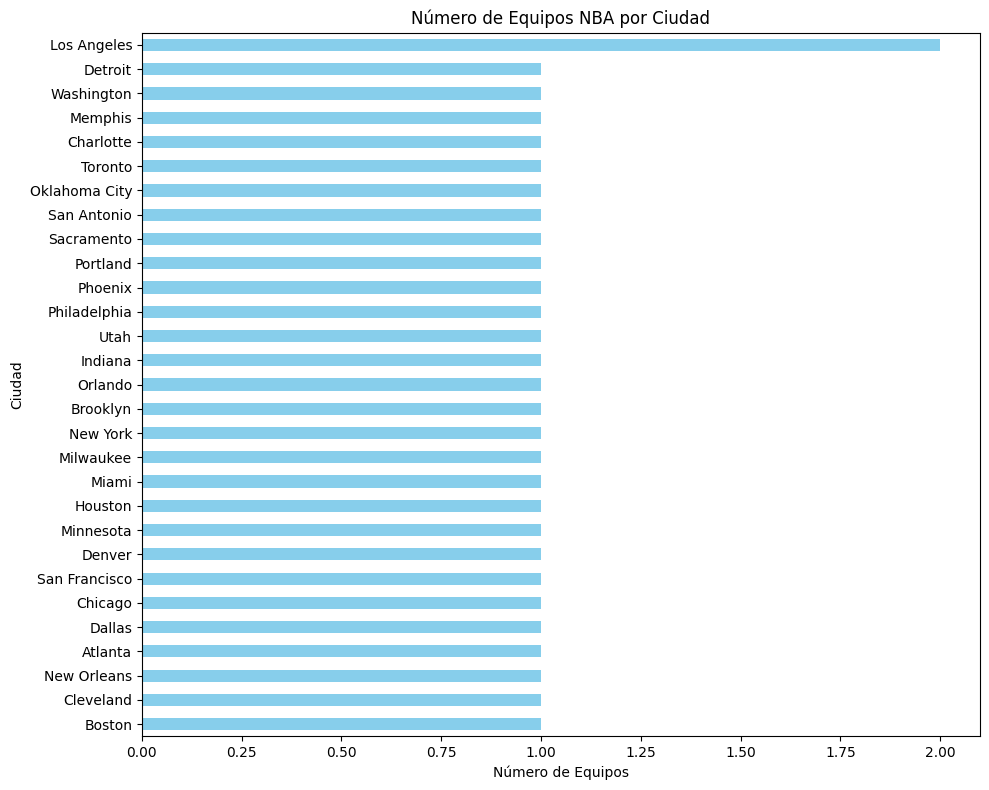

In [6]:
# Creamos un lienzo para este gráfico
plt.figure(figsize=(10, 8))

# Contamos cuántas veces aparece cada ciudad y lo ordenamos
city_counts = df_team['city'].value_counts().sort_values(ascending=True)

# Hacemos un gráfico de barras horizontal
city_counts.plot(kind='barh', color='skyblue')

plt.title('Número de Equipos NBA por Ciudad')
plt.xlabel('Número de Equipos')
plt.ylabel('Ciudad')

# Aseguramos que las etiquetas no se corten
plt.tight_layout()

# Muestra el gráfico finalizado en esta celda
plt.show()

CSV "TEAM_DETAILS": GUARDA INFORMACIÓN ADICIONAL DE LOS 30 QUE ACTUALMENTE COMPITEN EN LA NBA

In [7]:
# Ruta del archivo CSV
file_path = 'C:\\Users\\FranciscoJH\\Downloads\\team_details.csv'

try:
    # Cargar el DataFrame
    df_team_details = pd.read_csv(file_path)

    print(f"--- Análisis EDA para: TEAM DETAILS---")

    #1. Información General
    print("\n--- 1. Información General (Tipos de Datos y Nulos) ---")
    df_team_details.info()

    # 2. df.shape - Para ver dimensiones
    print("\n--- 2. Forma del DataFrame (Filas, Columnas) ---")
    print(df_team_details.shape)

    # 3. df.isnull().sum() - Conteo explícito de nulos
    print("\n--- 3. Conteo de Valores Nulos por Columna ---")
    print(df_team_details.isnull().sum())

    # --- 4. Porcentaje de Valores Nulos por Columna (%) ---
    # (Este es el nuevo bloque que pediste)
    print("\n--- 4. Porcentaje de Valores Nulos por Columna (%) ---")
    # Dividimos el conteo de nulos por el total de filas y multiplicamos por 100
    total_rows = len(df_team_details)
    null_percentage = (df_team_details.isnull().sum() / total_rows) * 100
    print(null_percentage)

    # 5. df.describe(include='all') - Estadísticas básicas para TODAS las columnas
    print("\n--- 5. Estadísticas Descriptivas (Numéricas y Texto) ---")
    print(df_team_details.describe(include='all'))

    # 6. df.head() - Para ver las primeras filas
    print("\n--- 6. Primeras 5 Filas (Muestra de Datos) ---")
    print(df_team_details.head())

except FileNotFoundError:
    print(f"Error: No se encontró el archivo '{file_path}'.")
except Exception as e:
    print(f"Se produjo un error al procesar el archivo: {e}")

--- Análisis EDA para: TEAM DETAILS---

--- 1. Información General (Tipos de Datos y Nulos) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   team_id             30 non-null     int64  
 1   arena               30 non-null     object 
 2   arenacapacity       30 non-null     float64
 3   owner               30 non-null     object 
 4   generalmanager      30 non-null     object 
 5   headcoach           30 non-null     object 
 6   dleagueaffiliation  30 non-null     object 
 7   facebook            30 non-null     object 
 8   instagram           30 non-null     object 
 9   twitter             30 non-null     object 
dtypes: float64(1), int64(1), object(8)
memory usage: 2.5+ KB

--- 2. Forma del DataFrame (Filas, Columnas) ---
(30, 10)

--- 3. Conteo de Valores Nulos por Columna ---
team_id               0
arena               

COMIENZO CON LA LIMPIEZA DE LOS DATOS

In [ ]:
print("\n--- Aplicando Limpieza de Datos ---")

# Arreglo 1: Convertir 'team_id' de integer a string/object
if 'team_id' in df_team_details.columns:
    df_team_details['team_id'] = df_team_details['team_id'].astype(str)
    print("   - 'team_id' convertido a string (object).")

# Arreglo 2: Elimino las columnas que el dataset team ya tiene
df_team_details.drop(columns=['abbreviation', 'city', 'nickname', 'yearfounded'], inplace=True)
print("   - Eliminadas columnas redundantes: 'abbreviation', 'city', 'nickname', 'yearfounded'.")


#Arreglo 3: Voy a rellenar valores nulos en las columna 'headcoach' y 'arenacapacity'
# Creo un diccionario.
# 'key' = nombre de la columna, 'value' = valor con el que se rellenará el valor nulo
valores_a_rellenar = {
    'headcoach': 'no tiene coach', 
    'arenacapacity': 0
}
# .fillna() reemplazará los nulos solo en las columnas que especificamos
df_team_details.fillna(value=valores_a_rellenar, inplace=True)


AGREGÉ EQUIPOS FALTANTES

In [ ]:
#Arreglo 4: Noté que al dataset team_details le faltan 5 equipos de los 30 equipos totales de la NBA.
#Por eso primero voy a identificarlos
# Nos aseguramos de que ambas columnas 'id' sean de tipo string
# para que la comparación funcione (ej: "123" vs "123")
df_team['id'] = df_team['id'].astype(str)
df_team_details['team_id'] = df_team_details['team_id'].astype(str)

# Obtenemos la lista de IDs que SÍ tenemos
# Esto crea una lista (Series) de todos los IDs presentes en df_team_details
ids_existentes = df_team_details['team_id']

# Filtrar df_team
# Usamos el operador '~' (que significa 'NOT')
df_equipos_faltantes = df_team[~df_team['id'].isin(ids_existentes)]
print(f"Se encontraron {len(df_equipos_faltantes)} equipos faltantes.")

# Creamos un nuevo DataFrame solo con los IDs que faltan
# Renombramos 'id' a 'team_id' para que coincida con df_team_details
df_para_agregar = df_equipos_faltantes[['id']].rename(columns={'id': 'team_id'})

print("\n--- IDs que se van a agregar ---")
print(df_para_agregar)

# Usamos pd.concat para "apilar" el DataFrame original y el nuevo
# 'ignore_index=True' es importante para re-generar un índice limpio (0-29)
# 'sort=False' evita que se reordenen las columnas (buena práctica)
df_team_details_completo = pd.concat([df_team_details, df_para_agregar], 
                                     ignore_index=True, 
                                     sort=False)




Se encontraron 5 equipos faltantes.

--- IDs que se van a agregar ---
       team_id
1   1610612738
2   1610612739
3   1610612740
15  1610612752
16  1610612753

Filas en 'df_team_details' (original): 25
Filas en 'df_team_details_completo' (nuevo): 30

--- Verificación de los equipos agregados (deberían tener 'team_id' y nulos en el resto) ---
       team_id arena  arenacapacity owner generalmanager headcoach  \
25  1610612738   NaN            NaN   NaN            NaN       NaN   
26  1610612739   NaN            NaN   NaN            NaN       NaN   
27  1610612740   NaN            NaN   NaN            NaN       NaN   
28  1610612752   NaN            NaN   NaN            NaN       NaN   
29  1610612753   NaN            NaN   NaN            NaN       NaN   

   dleagueaffiliation facebook instagram twitter  
25                NaN      NaN       NaN     NaN  
26                NaN      NaN       NaN     NaN  
27                NaN      NaN       NaN     NaN  
28                NaN      NaN

In [ ]:
# Crear el DataFrame con los datos nuevos
datos_faltantes = [
    {
        'team_id': '1610612738', 'arena': 'TD Garden', 'arenacapacity': 19156, 
        'owner': 'Wyc Grousbeck', 'generalmanager': 'Brad Stevens', 'headcoach': 'Joe Mazzulla',
        'dleagueaffiliation': 'Maine Celtics', 'facebook': 'https://www.facebook.com/celtics', 
        'instagram': 'https://www.instagram.com/celtics', 'twitter': 'https://twitter.com/celtics'
    },
    {
        'team_id': '1610612739', 'arena': 'Rocket Arena', 'arenacapacity': 19432, 
        'owner': 'Dan Gilbert', 'generalmanager': 'Koby Altman', 'headcoach': 'Kenny Atkinson',
        'dleagueaffiliation': 'Cleveland Charge', 'facebook': 'https://www.facebook.com/Cavaliers', 
        'instagram': 'https://www.instagram.com/cavs', 'twitter': 'https://twitter.com/cavs'
    },
    {
        'team_id': '1610612740', 'arena': 'Smoothie King Center', 'arenacapacity': 16867, 
        'owner': 'Gayle Benson', 'generalmanager': 'Trajan Langdon', 'headcoach': 'Willie Green',
        'dleagueaffiliation': 'Birmingham Squadron', 'facebook': 'https://www.facebook.com/PelicansNBA', 
        'instagram': 'https://www.instagram.com/pelicansnba', 'twitter': 'https://twitter.com/PelicansNBA'
    },
    {
        'team_id': '1610612752', 'arena': 'Madison Square Garden', 'arenacapacity': 19812, 
        'owner': 'James Dolan', 'generalmanager': 'Leon Rose', 'headcoach': 'Tom Thibodeau',
        'dleagueaffiliation': 'Westchester Knicks', 'facebook': 'https://www.facebook.com/NYKnicks', 
        'instagram': 'https://www.instagram.com/nyknicks', 'twitter': 'https://twitter.com/nyknicks'
    },
    {
        'team_id': '1610612753', 'arena': 'Kia Center', 'arenacapacity': 18846, 
        'owner': 'Dan DeVos', 'generalmanager': 'Anthony Parker', 'headcoach': 'Jamahl Mosley',
        'dleagueaffiliation': 'Osceola Magic', 'facebook': 'https://www.facebook.com/OrlandoMagic/', 
        'instagram': 'https://www.instagram.com/orlandomagic', 'twitter': 'https://twitter.com/OrlandoMagic'
    }
]

df_nuevos_detalles = pd.DataFrame(datos_faltantes)


# Asegurar tipos de datos consistentes
df_team_details['team_id'] = df_team_details['team_id'].astype(str)
df_nuevos_detalles['team_id'] = df_nuevos_detalles['team_id'].astype(str)


# Filtrar y Unir (La parte clave)

# Filtramos 'df_team_details' para quedarnos solo con las filas que SÍ tienen datos.
# Usamos 'arena' como referencia (ya que estaba vacía en las filas nuevas)
df_team_details_originales = df_team_details.dropna(subset=['arena'])

print(f"Filas originales con datos: {len(df_team_details_originales)}")
print(f"Filas nuevas a agregar: {len(df_nuevos_detalles)}")

# Concatenamos (apilamos) las filas originales y las nuevas
# Y lo reasignamos a tu variable 'df_team_details'
df_team_details = pd.concat([df_team_details_originales, df_nuevos_detalles], 
                            ignore_index=True)


# Verificación
print("\n--- ¡LIMPIEZA COMPLETA! ---")
print(f"Total de filas en 'df_team_details' (final): {len(df_team_details)}")
print("\nVerificación (Celtics):")
print(df_team_details[df_team_details['team_id'] == '1610612738'])
print("\nVerificación (Knicks):")
print(df_team_details[df_team_details['team_id'] == '1610612752'])

Filas originales con datos: 25
Filas nuevas a agregar: 5

--- ¡LIMPIEZA COMPLETA! ---
Total de filas en 'df_team_details' (final): 30

Verificación (Celtics):
       team_id      arena  arenacapacity          owner generalmanager  \
25  1610612738  TD Garden        19156.0  Wyc Grousbeck   Brad Stevens   

       headcoach dleagueaffiliation                          facebook  \
25  Joe Mazzulla      Maine Celtics  https://www.facebook.com/celtics   

                            instagram                      twitter  
25  https://www.instagram.com/celtics  https://twitter.com/celtics  

Verificación (Knicks):
       team_id                  arena  arenacapacity        owner  \
28  1610612752  Madison Square Garden        19812.0  James Dolan   

   generalmanager      headcoach  dleagueaffiliation  \
28      Leon Rose  Tom Thibodeau  Westchester Knicks   

                             facebook                           instagram  \
28  https://www.facebook.com/NYKnicks  https://www.ins

HAY ESTADIOS QUE NO CONOCEMOS SU CAPACIDAD, POR ESO BUSCAREMOS Y COMPLETAREMOS EL DATO

PRIMERO VOY A FUSIONAR LOS DOS DATASETS CON LOS QUE ESTUVE TRABAJANDO

In [9]:
# Hacemos el merge usando 'id' de df_team y 'team_id' de df_team_details
df_completo = pd.merge(
    df_team, 
    df_team_details, 
    left_on='id', 
    right_on='team_id',
    suffixes=('_team', '_details') # (Por si hay columnas con el mismo nombre)
)

print(f"DataFrame 'df_completo' creado con {len(df_completo)} filas.")
df_completo.info()

DataFrame 'df_completo' creado con 30 filas.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  30 non-null     object 
 1   full_name           30 non-null     object 
 2   abbreviation        30 non-null     object 
 3   nickname            30 non-null     object 
 4   city                30 non-null     object 
 5   state               30 non-null     object 
 6   year_founded        30 non-null     int64  
 7   team_id             30 non-null     object 
 8   arena               30 non-null     object 
 9   arenacapacity       30 non-null     float64
 10  owner               30 non-null     object 
 11  generalmanager      30 non-null     object 
 12  headcoach           30 non-null     object 
 13  dleagueaffiliation  30 non-null     object 
 14  facebook            30 non-null     object 
 15  instagram     

In [17]:
#Antes de comenzar con los gráficos, rellenaré la capacidad de las arenas que están en 0

filtro_cero = df_completo['arenacapacity'] == 0

df_sin_capacidad = df_completo[filtro_cero]

# --- 4. Mostrar los resultados ---
if len(df_sin_capacidad) > 0:
    print(f"Se encontraron {len(df_sin_capacidad)} equipos sin datos de 'arenacapacity':")
    # Mostramos las columnas clave para que puedas identificarlos
    # (Usamos 'nickname' y 'arena' que vienen de la fusión)
    print(df_sin_capacidad[['id','arena', 'arenacapacity']])
else:
    print("¡Buenas noticias! Todos los 30 equipos tienen un valor de 'arenacapacity' válido (distinto de 0 o nulo).")

# Diccionario con las capacidades correctas de los 9 equipos que faltan
# Llave = ID del equipo (como string), Valor = Capacidad (como int)
patch_capacidades = {
    '1610612743': 19520, # Denver Nuggets (Ball Arena)
    '1610612744': 18064, # Golden State Warriors (Chase Center)
    '1610612751': 17732, # Brooklyn Nets (Barclays Center)
    '1610612755': 20478, # Philadelphia 76ers (Wells Fargo Center)
    '1610612756': 17071, # Phoenix Suns (Footprint Center)
    '1610612760': 18203, # OKC Thunder (Paycom Center)
    '1610612761': 19800, # Toronto Raptors (Scotiabank Arena)
    '1610612762': 18306, # Utah Jazz (Delta Center)
    '1610612765': 20332  # Detroit Pistons (Little Caesars Arena)
}

print("--- Arreglando 'arenacapacity' ---")

# Esta función reemplaza los 0 o NaN con el valor del diccionario
def aplicar_parche(row):
    # Aseguramos que el ID sea string
    team_id = str(row['id']) 
    
    # Si el ID está en nuestro parche Y la capacidad es 0 (o NaN)...
    if team_id in patch_capacidades and (row['arenacapacity'] == 0 or pd.isna(row['arenacapacity'])):
        # ...devuelve el valor correcto del parche.
        return patch_capacidades[team_id]
    else:
        # ...de lo contrario, devuelve el valor que ya tenía.
        return row['arenacapacity']

# Aplicando a 'df_completo'
# Usamos .apply() para revisar cada fila.
# 'axis=1' significa "aplicar la función a cada FILA"
if 'df_completo' in locals(): # (Verifica si df_completo existe)
    # Nota: df_completo ya tiene 'id' y 'arenacapacity' gracias a la fusión
    df_completo['arenacapacity'] = df_completo.apply(aplicar_parche, axis=1)
    print("DataFrame 'df_completo' ha sido parchado.")


# Aplicando a 'df_team_details'
# (Necesitamos renombrar 'id' a 'team_id' temporalmente en la función)
def aplicar_parche_details(row):
    team_id = str(row['team_id']) 
    if team_id in patch_capacidades and (row['arenacapacity'] == 0 or pd.isna(row['arenacapacity'])):
        return patch_capacidades[team_id]
    else:
        return row['arenacapacity']

if 'df_team_details' in locals(): # (Verifica si df_team_details existe)
    df_team_details['arenacapacity'] = df_team_details.apply(aplicar_parche_details, axis=1)
    print("\nDataFrame 'df_team_details' ha sido parchado.")

print("\n--- Limpieza de capacidad completada ---")

Se encontraron 9 equipos sin datos de 'arenacapacity':
            id                 arena  arenacapacity
6   1610612743            Ball Arena            0.0
7   1610612744          Chase Center            0.0
14  1610612751       Barclays Center            0.0
18  1610612755    Wells Fargo Center            0.0
19  1610612756      Footprint Center            0.0
23  1610612760         Paycom Center            0.0
24  1610612761      Scotiabank Arena            0.0
25  1610612762          Delta Center            0.0
28  1610612765  Little Caesars Arena            0.0
--- Arreglando 'arenacapacity' ---
DataFrame 'df_completo' ha sido parchado.

DataFrame 'df_team_details' ha sido parchado.

--- Limpieza de capacidad completada ---


In [19]:
#Terminado el proceso de limpieza, guardo el DataFrame limpio en un nuevo archivo CSV
file_path = 'C:\\Users\\FranciscoJH\\Downloads\\team_details.csv'
df_team_details.to_csv(file_path, index=False)

AHORA COMIENZAN LOS GRÁFICOS

ESTADIOS CON MAYOR CAPACIDAD

C:\Users\FranciscoJH\AppData\Local\Temp\ipykernel_9668\261123748.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


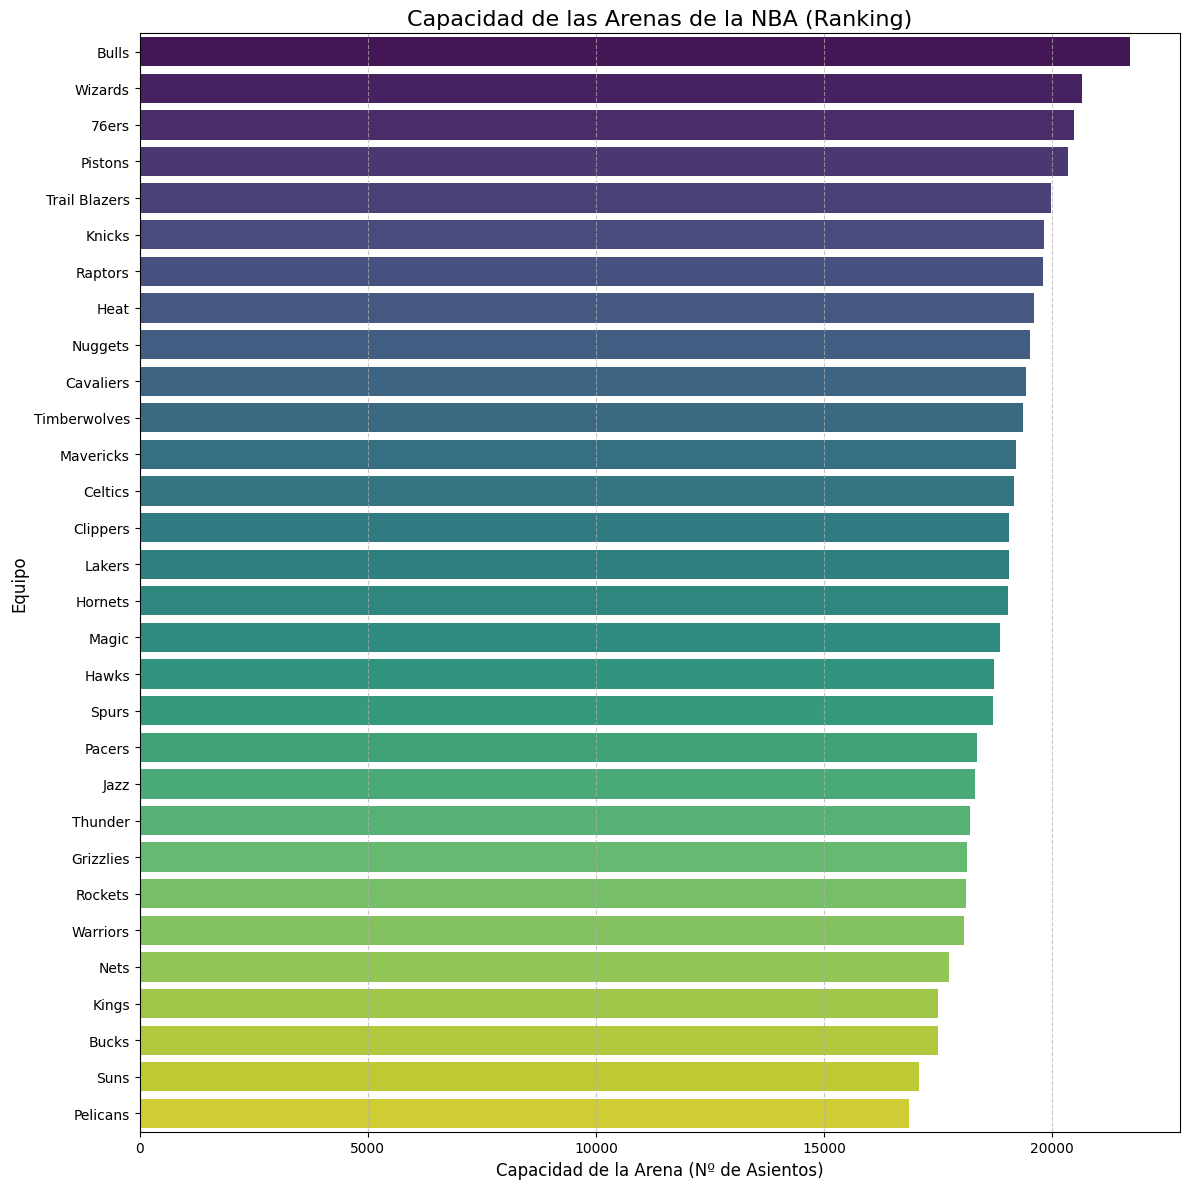

In [20]:
# Ordenamos los equipos por capacidad de arena, de mayor a menor
df_plot_capacidad = df_completo.sort_values('arenacapacity', ascending=False)

# Creamos un lienzo (figura)
# Lo hacemos alto (12) para que quepan los 30 nombres de equipos
plt.figure(figsize=(12, 12))

# Creamos el gráfico de barras horizontal
# Usamos 'nickname' para las etiquetas (eje Y) y 'arenacapacity' para los valores (eje X)
sns.barplot(
    x='arenacapacity', 
    y='nickname', 
    data=df_plot_capacidad,
    palette='viridis' # (Una paleta de colores agradable)
)

plt.title('Capacidad de las Arenas de la NBA (Ranking)', fontsize=16)
plt.xlabel('Capacidad de la Arena (Nº de Asientos)', fontsize=12)
plt.ylabel('Equipo', fontsize=12)

# Añadimos una cuadrícula vertical para facilitar la lectura
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

HUELLA EN LA G-LEAGUE

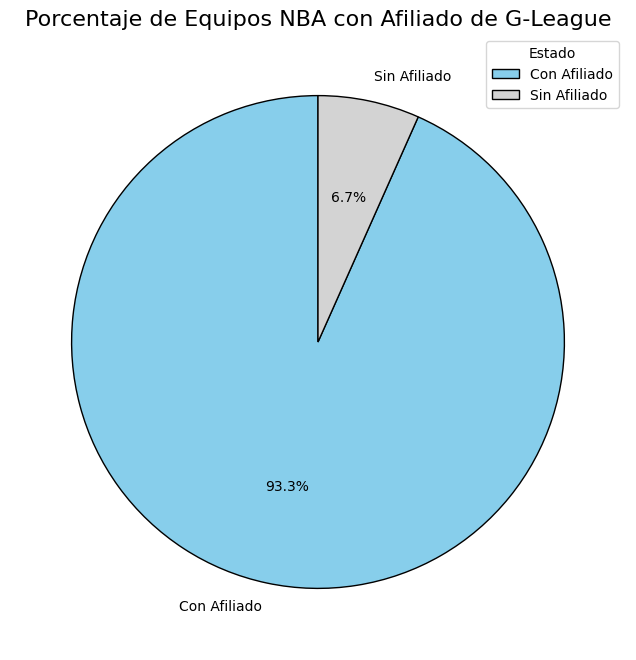

In [21]:
# Usamos .apply() para crear nuestra serie binaria
# 1. Rellenamos cualquier NaN (si es que aún existen) con 'novafiliat'
# 2. Aplicamos la lógica: si es 'novafiliat', etiquétalo como 'Sin Afiliado',
#    si es cualquier otra cosa ('Maine Celtics', 'Cleveland Charge', etc.), 
#    etiquétalo como 'Con Afiliado'.

afiliacion_binaria = df_completo['dleagueaffiliation'].fillna('No Affiliate').apply(
    lambda x: 'Sin Afiliado' if x == 'No Affiliate' else 'Con Afiliado'
)

# 2. Contamos los valores
afiliacion_counts = afiliacion_binaria.value_counts()

# 3. Creamos el gráfico
plt.figure(figsize=(8, 8))

afiliacion_counts.plot(
    kind='pie', 
    autopct='%1.1f%%',  # Muestra los porcentajes
    startangle=90,      
    colors=['skyblue', 'lightgrey'],
    wedgeprops={'edgecolor': 'black'} # Bordes para las porciones
)

plt.title('Porcentaje de Equipos NBA con Afiliado de G-League', fontsize=16)
plt.ylabel('') # Quitamos la etiqueta del eje Y
plt.legend(title="Estado", loc="best")
plt.show()

Antigüedad de Equipo vs. Tamaño de Arena

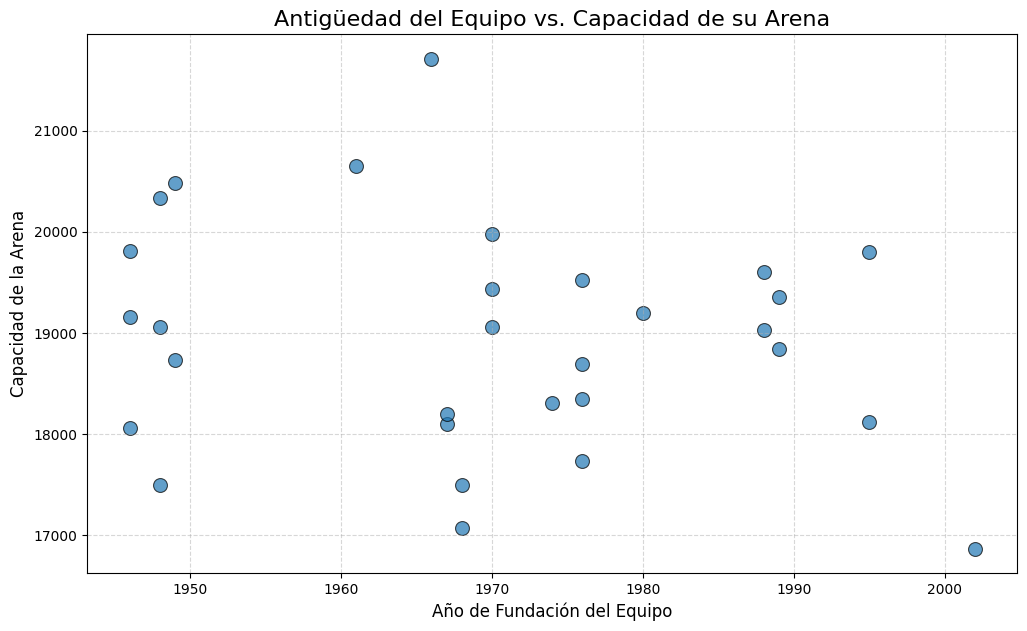

In [22]:
# Creamos un lienzo (figura)
plt.figure(figsize=(12, 7))

# Creamos el gráfico de dispersión (scatter plot)
# Usamos 'year_founded' en el eje X y 'arenacapacity' en el eje Y
sns.scatterplot(
    x='year_founded',
    y='arenacapacity',
    data=df_completo,
    s=100, # (Tamaño de los puntos)
    alpha=0.7,
    edgecolor='black'
)

plt.title('Antigüedad del Equipo vs. Capacidad de su Arena', fontsize=16)
plt.xlabel('Año de Fundación del Equipo', fontsize=12)
plt.ylabel('Capacidad de la Arena', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Capacidad de Arenas por Estado

C:\Users\FranciscoJH\AppData\Local\Temp\ipykernel_9668\1133808196.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


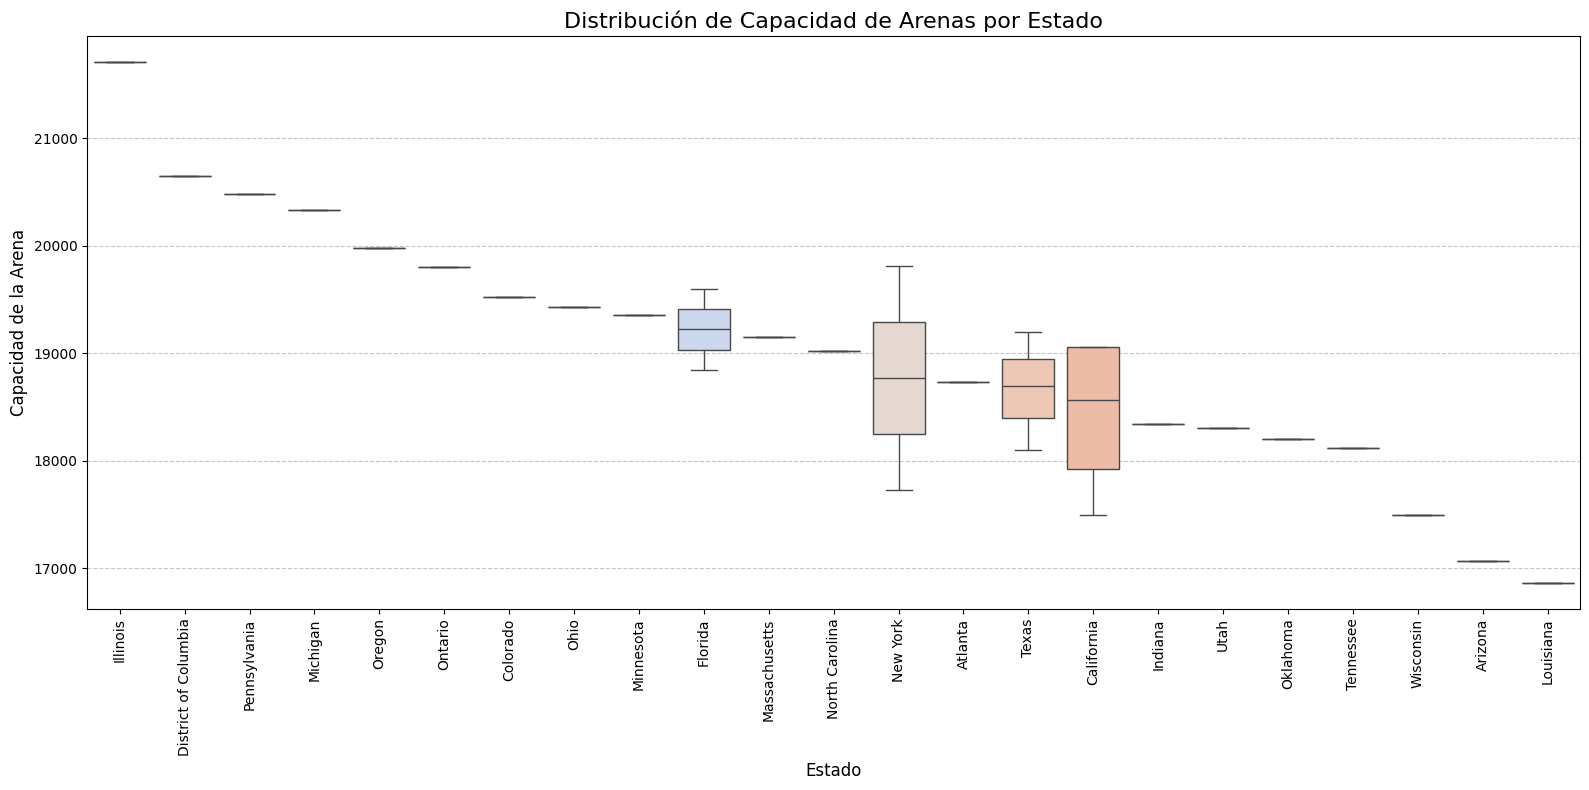

In [23]:
# Creamos un lienzo (figura) más ancho
plt.figure(figsize=(16, 8))

# Ordenamos los estados por la mediana de capacidad (para un gráfico más limpio)
sorted_states = df_completo.groupby('state')['arenacapacity'].median().sort_values(ascending=False).index

# Creamos el gráfico de cajas (boxplot)
# Es ideal para ver la distribución de datos
sns.boxplot(
    x='state',
    y='arenacapacity',
    data=df_completo,
    order=sorted_states, # (Usamos el orden que creamos)
    palette='coolwarm'
)

plt.title('Distribución de Capacidad de Arenas por Estado', fontsize=16)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Capacidad de la Arena', fontsize=12)

# Rotamos las etiquetas del eje X para que no se superpongan
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Antes de seguir con los graficos descargo el dataset con información de los partidos

In [24]:
# Ruta del archivo CSV
file_path = 'C:\\Users\\FranciscoJH\\Downloads\\game.csv'

try:
    # Cargar el DataFrame
    df_game = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: No se encontró el archivo '{file_path}'.")
except Exception as e:
    print(f"Se produjo un error al procesar el archivo: {e}")

In [26]:
#Voy a tomar los datos de los partidos de 2010, hacia adelante
# Nos aseguramos de que la columna 'game_date' sea de tipo fecha
columna_fecha = 'game_date'
# 'errors=coerce' convertirá cualquier fecha rota en 'NaT' (Not a Time)
print(f"Convirtiendo la columna '{columna_fecha}' a formato de fecha...")
df_game[columna_fecha] = pd.to_datetime(df_game[columna_fecha], errors='coerce')
# Extraemos el año de la fecha y filtramos
print("Filtrando datos entre 2010 hacia adelante...")
df_game = df_game[(df_game[columna_fecha].dt.year >= 2010)]


Convirtiendo la columna 'game_date' a formato de fecha...
Filtrando datos entre 2010 hacia adelante...


In [27]:
#Guardo el DataFrame limpio en un nuevo archivo CSV
file_path = 'C:\\Users\\FranciscoJH\\Downloads\\game.csv'
df_game.to_csv(file_path, index=False)

CONTINÚO CON LOS GRÁFICOS

Capacidad del Estadio vs. Ventaja de Local

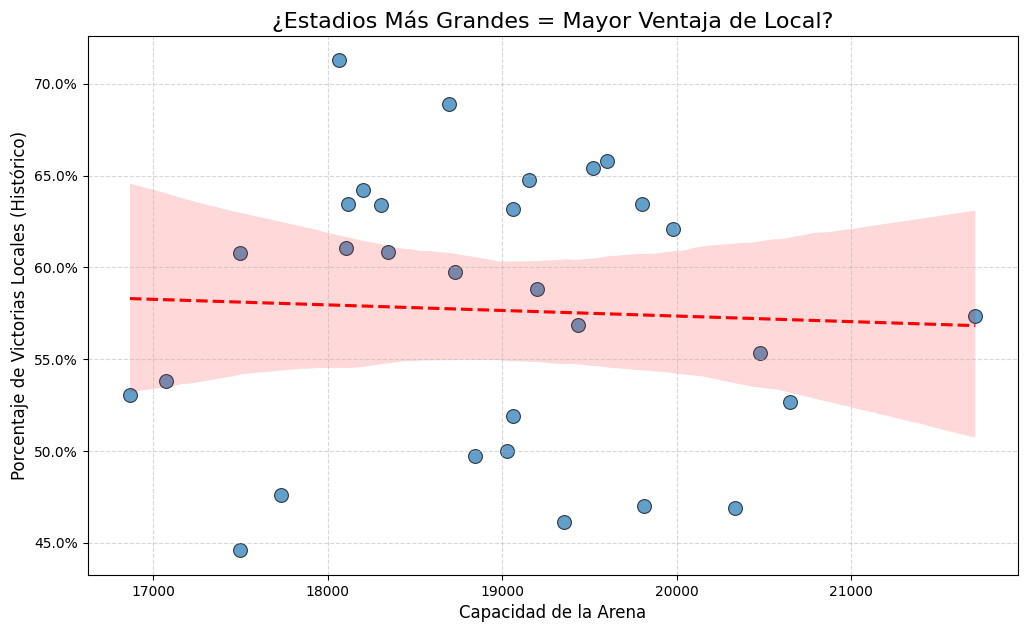

In [29]:
# Preparar Datos de Victorias Locales

# Creamos una columna numérica (1 para victoria, 0 para derrota)
df_game['home_win'] = df_game['wl_home'].apply(lambda x: 1 if x == 'W' else 0)

# Agrupamos por equipo local (team_id_home) y calculamos el promedio (mean) de victorias
# El promedio de 1s y 0s es el porcentaje de victorias
home_win_pct = df_game.groupby('team_id_home')['home_win'].mean()

# Convertimos la Serie a un DataFrame y renombramos las columnas para la fusión
home_win_pct_df = home_win_pct.reset_index()
home_win_pct_df.columns = ['team_id', 'home_win_percentage']


# Preparar Datos de Capacidad
# Nos aseguramos de que las claves de fusión (IDs) sean del mismo tipo (string)
home_win_pct_df['team_id'] = home_win_pct_df['team_id'].astype(str)
df_completo['id'] = df_completo['id'].astype(str)


# Fusionar (Merge)
# Unimos el % de victorias locales con nuestro DataFrame de equipos
df_grafico_1 = pd.merge(
    df_completo,
    home_win_pct_df,
    left_on='id',  # Clave de df_completo
    right_on='team_id' # Clave de home_win_pct_df
)


# --- 4. Graficar (Scatter Plot) ---
plt.figure(figsize=(12, 7))

sns.scatterplot(
    data=df_grafico_1,
    x='arenacapacity',
    y='home_win_percentage',
    s=100, # Tamaño de los puntos
    alpha=0.7,
    edgecolor='black'
)

# Añadimos una línea de regresión para ver la tendencia
sns.regplot(
    data=df_grafico_1,
    x='arenacapacity',
    y='home_win_percentage',
    scatter=False, # (No dibujar los puntos de nuevo)
    color='red',
    line_kws={'linestyle':'--'}
)

plt.title('¿Estadios Más Grandes = Mayor Ventaja de Local?', fontsize=16)
plt.xlabel('Capacidad de la Arena', fontsize=12)
plt.ylabel('Porcentaje de Victorias Locales (Histórico)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Convertir el eje Y a porcentaje
from matplotlib.ticker import PercentFormatter
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))

plt.show()

Afiliación a G-League vs. Victorias Totales

Preparando datos de afiliación...
Fusionando datos...
Datos fusionados. 897 registros de 'equipo-temporada' listos.
Generando gráfico comparativo...


C:\Users\FranciscoJH\AppData\Local\Temp\ipykernel_9668\2126588498.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_afiliacion['id'] = df_afiliacion['id'].astype(str)
C:\Users\FranciscoJH\AppData\Local\Temp\ipykernel_9668\2126588498.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


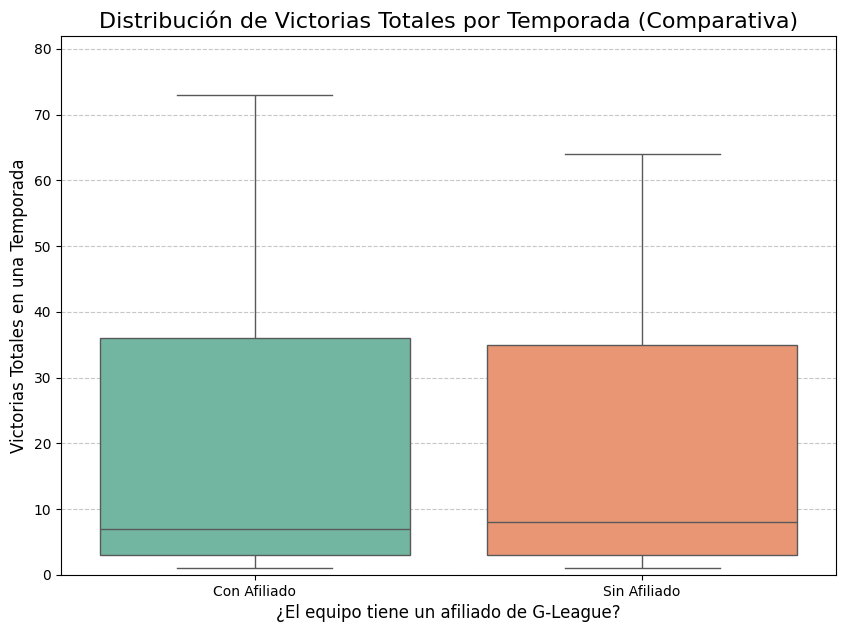

In [35]:
#Preparar Datos de Victorias Totales por Temporada

# Calcular victorias locales por temporada
home_wins = df_game[df_game['wl_home'] == 'W'].groupby(['season_id', 'team_id_home']).size().reset_index(name='home_wins')
home_wins.rename(columns={'team_id_home': 'team_id'}, inplace=True)

# Calcular victorias visitantes por temporada
away_wins = df_game[df_game['wl_away'] == 'W'].groupby(['season_id', 'team_id_away']).size().reset_index(name='away_wins')
away_wins.rename(columns={'team_id_away': 'team_id'}, inplace=True)

# Fusionar victorias locales y visitantes 
df_wins_per_season = pd.merge(
    home_wins,
    away_wins,
    on=['season_id', 'team_id'], 
    how='outer' 
)

# Rellenar NaNs (equipos con 0 victorias) y sumar
df_wins_per_season['home_wins'] = df_wins_per_season['home_wins'].fillna(0)
df_wins_per_season['away_wins'] = df_wins_per_season['away_wins'].fillna(0)
df_wins_per_season['total_wins'] = df_wins_per_season['home_wins'] + df_wins_per_season['away_wins']


# --- 2. Preparar Datos de Afiliación (G-League) ---
print("Preparando datos de afiliación...")

# Creamos la columna binaria
# (Usando 'No Affiliate' como el string para "Sin Afiliado", como indicaste)
df_completo['Tiene_Afiliado'] = df_completo['dleagueaffiliation'].fillna('No Affiliate').apply(
    lambda x: 'Sin Afiliado' if x == 'No Affiliate' else 'Con Afiliado'
)

# Seleccionamos las columnas que necesitamos para el merge
df_afiliacion = df_completo[['id', 'Tiene_Afiliado']]


# --- 3. Fusionar ---
print("Fusionando datos...")

# Aseguramos que las claves sean del mismo tipo (string) para un merge seguro
df_wins_per_season['team_id'] = df_wins_per_season['team_id'].astype(str)
df_afiliacion['id'] = df_afiliacion['id'].astype(str)

df_grafico_2 = pd.merge(
    df_wins_per_season,
    df_afiliacion,
    left_on='team_id',
    right_on='id'
)

print(f"Datos fusionados. {len(df_grafico_2)} registros de 'equipo-temporada' listos.")

# --- 4. Graficar (Boxplot) ---
print("Generando gráfico comparativo...")

plt.figure(figsize=(10, 7))

# Seaborn crea automáticamente los dos boxplots, uno para cada
# categoría encontrada en la columna 'Tiene_Afiliado'
sns.boxplot(
    data=df_grafico_2,
    x='Tiene_Afiliado',
    y='total_wins',
    palette='Set2' # (Paleta de colores para los dos grupos)
)

plt.title('Distribución de Victorias Totales por Temporada (Comparativa)', fontsize=16)
plt.xlabel('¿El equipo tiene un afiliado de G-League?', fontsize=12)
plt.ylabel('Victorias Totales en una Temporada', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Fijamos el límite de Y para que el gráfico sea consistente (0-82 partidos)
plt.ylim(0, 82)

# Muestra el gráfico finalizado en esta celda
plt.show()

CSV "LESIONES": GUARDA INFORMACIÓN DE LOS JUGADORES LESIONADOS EN LAS TEMPORADAS DEL 2010 HASTA LA ACTUALIDAD

In [2]:
# Ruta del archivo CSV
file_path = "C:\\Users\\FranciscoJH\\Desktop\\lesiones_listas.csv"
    
try:
    # Cargar el DataFrame
    df_lesiones = pd.read_csv(file_path)

    print(f"--- Análisis EDA para: LESIONES---")

    #1. Información General
    print("\n--- 1. Información General (Tipos de Datos y Nulos) ---")
    df_lesiones.info()

    # 2. df.shape - Para ver dimensiones
    print("\n--- 2. Forma del DataFrame (Filas, Columnas) ---")
    print(df_lesiones.shape)

    # 3. df.isnull().sum() - Conteo explícito de nulos
    print("\n--- 3. Conteo de Valores Nulos por Columna ---")
    print(df_lesiones.isnull().sum())

    # --- 4. Porcentaje de Valores Nulos por Columna (%) ---
    # (Este es el nuevo bloque que pediste)
    print("\n--- 4. Porcentaje de Valores Nulos por Columna (%) ---")
    # Dividimos el conteo de nulos por el total de filas y multiplicamos por 100
    total_rows = len(df_lesiones)
    null_percentage = (df_lesiones.isnull().sum() / total_rows) * 100
    print(null_percentage)

    # 5. df.describe(include='all') - Estadísticas básicas para TODAS las columnas
    print("\n--- 5. Estadísticas Descriptivas (Numéricas y Texto) ---")
    print(df_lesiones.describe(include='all'))

    # 6. df.head() - Para ver las primeras filas
    print("\n--- 6. Primeras 5 Filas (Muestra de Datos) ---")
    print(df_lesiones.head())

except FileNotFoundError:
    print(f"Error: No se encontró el archivo '{file_path}'.")
except Exception as e:
    print(f"Se produjo un error al procesar el archivo: {e}")

--- Análisis EDA para: LESIONES---

--- 1. Información General (Tipos de Datos y Nulos) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25654 entries, 0 to 25653
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          25654 non-null  object 
 1   Team          25654 non-null  object 
 2   Acquired      12142 non-null  object 
 3   Relinquished  13513 non-null  object 
 4   Notes         25654 non-null  object 
 5   player_id     25654 non-null  float64
 6   id_registro   25654 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 1.4+ MB

--- 2. Forma del DataFrame (Filas, Columnas) ---
(25654, 7)

--- 3. Conteo de Valores Nulos por Columna ---
Date                0
Team                0
Acquired        13512
Relinquished    12141
Notes               0
player_id           0
id_registro         0
dtype: int64

--- 4. Porcentaje de Valores Nulos por Columna (%) ---
Date             0.

COMIENZO CON LA LIMPIEZA DE DATOS

In [3]:
#La columna 'Date' está en formato texto, la convierto a formato fecha
columna_fecha = 'Date'
# 'errors=coerce' convertirá cualquier fecha rota en 'NaT' (Not a Time)
print(f"Convirtiendo la columna '{columna_fecha}' a formato de fecha...")
df_lesiones[columna_fecha] = pd.to_datetime(df_lesiones[columna_fecha], errors='coerce')

Convirtiendo la columna 'Date' a formato de fecha...


In [4]:
#Guardo el DataFrame limpio en un nuevo archivo CSV
file_path = 'C:\\Users\\FranciscoJH\\Downloads\\lesiones_listas.csv'
df_lesiones.to_csv(file_path, index=False)

AHORA COMIENZO CON LOS GRÁFICOS

Top 10 Jugadores Más Lesionados

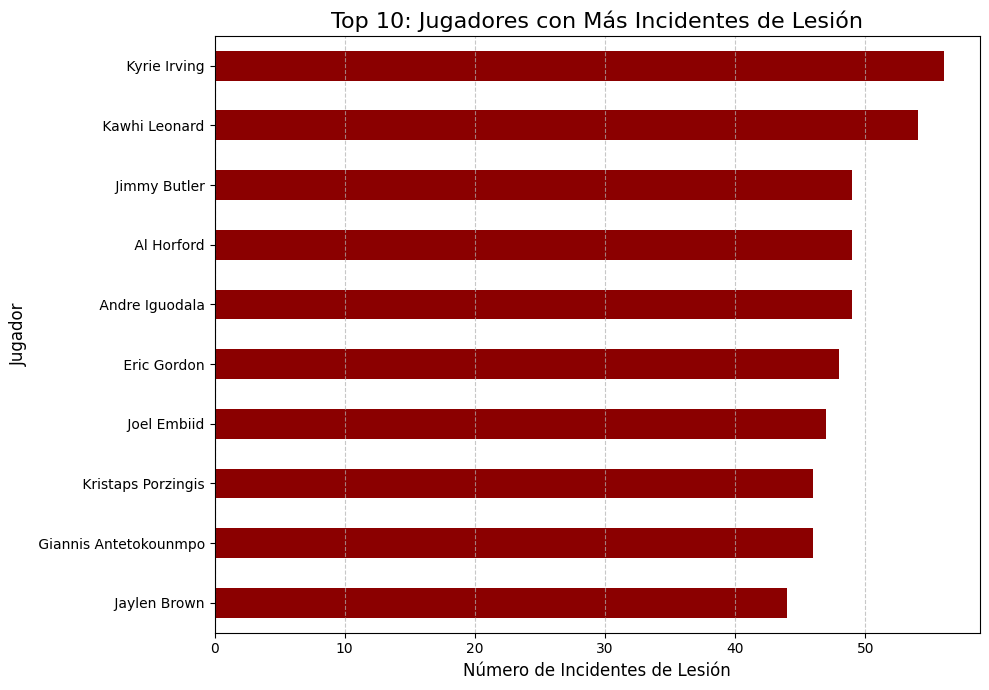

In [5]:
# Contamos los incidentes por jugador (columna 'Acquired')
top_10_jugadores = df_lesiones['Acquired'].value_counts().head(10)

# Creamos un lienzo (figura)
plt.figure(figsize=(10, 7))

# Graficamos (usamos .sort_values() para que el más alto quede arriba)
top_10_jugadores.sort_values(ascending=True).plot(kind='barh', color='darkred')

plt.title('Top 10: Jugadores con Más Incidentes de Lesión', fontsize=16)
plt.xlabel('Número de Incidentes de Lesión', fontsize=12)
plt.ylabel('Jugador', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

"Calendario del Dolor" (Lesiones por Mes)

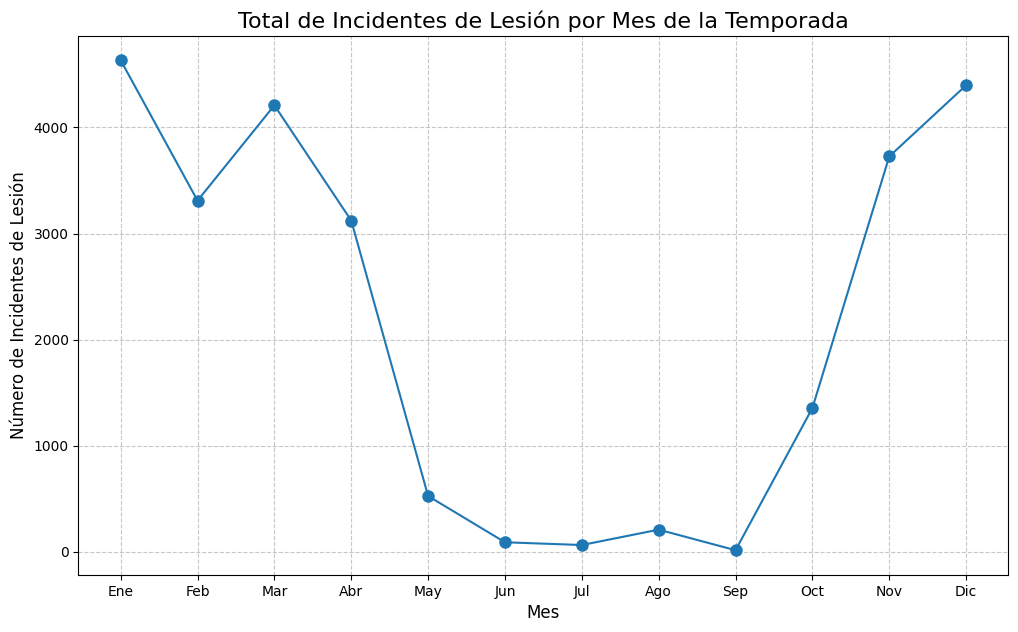

In [6]:
# Extraemos el mes de la columna 'Date' (que ya es datetime)
meses_lesion = df_lesiones['Date'].dt.month

# 2. Contamos los incidentes por mes
conteo_mensual = meses_lesion.value_counts().sort_index()

# 3. Creamos un lienzo (figura)
plt.figure(figsize=(12, 7))

# 4. Graficamos la línea
ax = conteo_mensual.plot(kind='line', marker='o', linestyle='-', markersize=8)

# 5. Arreglamos el eje X para que muestre los nombres de los meses
meses_nombres = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
# Aseguramos que solo muestre los 12 meses, incluso si faltan datos
ax.set_xticks(range(1, 13))
ax.set_xticklabels(meses_nombres)

plt.title('Total de Incidentes de Lesión por Mes de la Temporada', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Número de Incidentes de Lesión', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Top 10 Equipos con Más Incidentes de Lesión

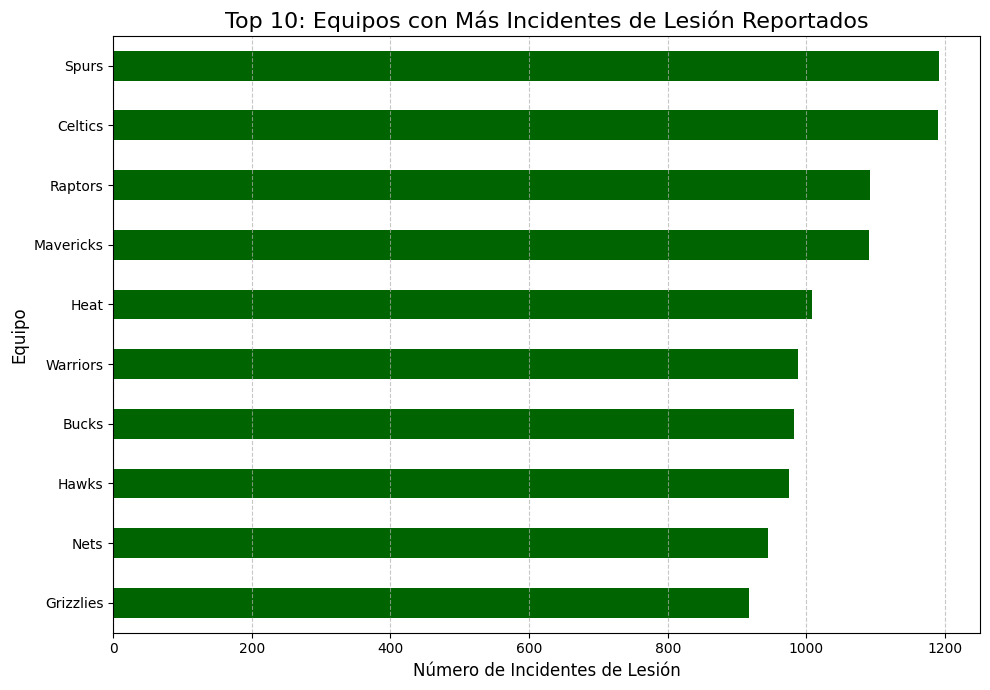

In [7]:
# Contamos los incidentes por equipo (columna 'Team')
top_10_equipos = df_lesiones['Team'].value_counts().head(10)

# Creamos un lienzo (figura)
plt.figure(figsize=(10, 7))

# Graficamos
top_10_equipos.sort_values(ascending=True).plot(kind='barh', color='darkgreen')

plt.title('Top 10: Equipos con Más Incidentes de Lesión Reportados', fontsize=16)
plt.xlabel('Número de Incidentes de Lesión', fontsize=12)
plt.ylabel('Equipo', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

TASA de Lesiones vs. TASA de Victorias

Paso 1: Calculando victorias y partidos totales por temporada...
Paso 2: Calculando incidentes de lesión...
Paso 3: Preparando el 'puente' de 'df_team'...
Paso 4: Fusionando victorias, partidos y lesiones...
Paso 5: Calculando tasas finales...
Paso 6: Generando gráfico de correlación...


C:\Users\FranciscoJH\AppData\Local\Temp\ipykernel_9800\1267674761.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bridge['id'] = df_bridge['id'].astype(str)


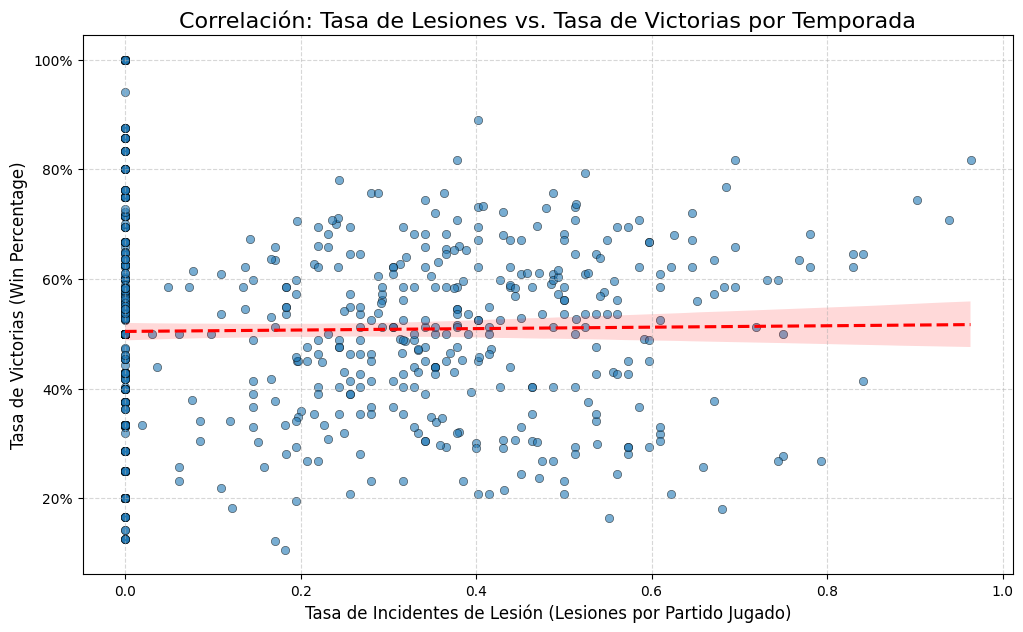


Coeficiente de correlación de Pearson (Normalizado): 0.0154


In [11]:
#Leo dataset de los partidos
file_path = 'C:\\Users\\FranciscoJH\\Downloads\\game.csv'
df_game = pd.read_csv(file_path)

# Preparar Datos de Victorias y Partidos Totales
print("Paso 1: Calculando victorias y partidos totales por temporada...")
home_wins = df_game[df_game['wl_home'] == 'W'].groupby(['season_id', 'team_id_home']).size().reset_index(name='home_wins')
home_wins.rename(columns={'team_id_home': 'team_id'}, inplace=True)
away_wins = df_game[df_game['wl_away'] == 'W'].groupby(['season_id', 'team_id_away']).size().reset_index(name='away_wins')
away_wins.rename(columns={'team_id_away': 'team_id'}, inplace=True)
home_games = df_game.groupby(['season_id', 'team_id_home']).size().reset_index(name='home_games')
home_games.rename(columns={'team_id_home': 'team_id'}, inplace=True)
away_games = df_game.groupby(['season_id', 'team_id_away']).size().reset_index(name='away_games')
away_games.rename(columns={'team_id_away': 'team_id'}, inplace=True)

df_wins = pd.merge(home_wins, away_wins, on=['season_id', 'team_id'], how='outer')
df_wins.fillna(0, inplace=True)
df_wins['total_wins'] = df_wins['home_wins'] + df_wins['away_wins']
df_games = pd.merge(home_games, away_games, on=['season_id', 'team_id'], how='outer')
df_games.fillna(0, inplace=True)
df_games['total_games'] = df_games['home_games'] + df_games['away_games']

df_game_rates = pd.merge(
    df_wins[['season_id', 'team_id', 'total_wins']],
    df_games[['season_id', 'team_id', 'total_games']],
    on=['season_id', 'team_id']
)
df_game_rates['win_percentage'] = df_game_rates['total_wins'] / df_game_rates['total_games']

# Preparar Datos de Lesiones 
print("Paso 2: Calculando incidentes de lesión...")
df_lesiones['Date'] = pd.to_datetime(df_lesiones['Date'], errors='coerce')

def get_season_id(date):
    if pd.isna(date): return None
    if date.month >= 10: return int(f"2{date.year}")
    else: return int(f"2{date.year - 1}")

df_lesiones['season_id'] = df_lesiones['Date'].apply(get_season_id)
df_lesiones_reales = df_lesiones[df_lesiones['Notes'].str.contains("placed on IL", na=False)]
df_injuries_count = df_lesiones_reales.groupby(['Team', 'season_id']).size().reset_index(name='total_injuries')

# Preparar el DataFrame "Puente" (df_team)
print("Paso 3: Preparando el 'puente' de 'df_team'...")
df_bridge = df_team[['id', 'nickname']]
df_bridge['id'] = df_bridge['id'].astype(str)

# Fusionar (Merge) Todo
print("Paso 4: Fusionando victorias, partidos y lesiones...")

# Aseguramos que 'team_id' en df_game_rates sea string, igual que 'id' en df_bridge
df_game_rates['team_id'] = df_game_rates['team_id'].astype(str)

# Unimos las tasas de juego (de df_game_rates) con el puente (df_bridge)
df_final_analysis = pd.merge(
    df_game_rates,
    df_bridge,
    left_on='team_id',
    right_on='id'
)

# Unimos el resultado anterior con el conteo de lesiones
df_final_analysis = pd.merge(
    df_final_analysis,
    df_injuries_count,
    left_on=['nickname', 'season_id'],
    right_on=['Team', 'season_id'],
    how='left'
)
df_final_analysis['total_injuries'] = df_final_analysis['total_injuries'].fillna(0)

# Calcular la TASA DE LESIONES (Sin cambios)
print("Paso 5: Calculando tasas finales...")
df_final_analysis['injuries_per_game'] = df_final_analysis['total_injuries'] / df_final_analysis['total_games']
df_final_analysis.replace([np.inf, -np.inf], np.nan, inplace=True)
df_final_analysis.dropna(subset=['injuries_per_game', 'win_percentage'], inplace=True)

# Graficar (Scatter Plot)
print("Paso 6: Generando gráfico de correlación...")
plt.figure(figsize=(12, 7))

sns.scatterplot(
    data=df_final_analysis,
    x='injuries_per_game',
    y='win_percentage',
    alpha=0.6,
    edgecolor='black'
)
sns.regplot(
    data=df_final_analysis,
    x='injuries_per_game',
    y='win_percentage',
    scatter=False, 
    color='red',
    line_kws={'linestyle':'--'}
)

plt.title('Correlación: Tasa de Lesiones vs. Tasa de Victorias por Temporada', fontsize=16)
plt.xlabel('Tasa de Incidentes de Lesión (Lesiones por Partido Jugado)', fontsize=12)
plt.ylabel('Tasa de Victorias (Win Percentage)', fontsize=12)

from matplotlib.ticker import PercentFormatter
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Calcular Correlación
correlation = df_final_analysis['injuries_per_game'].corr(df_final_analysis['win_percentage'])
print(f"\nCoeficiente de correlación de Pearson (Normalizado): {correlation:.4f}")